In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline 

In [3]:
train = pd.read_csv("sendylogisticsproject/Train.csv")
test = pd.read_csv("sendylogisticsproject/Test.csv")
riders = pd.read_csv("sendylogisticsproject/Riders.csv")

In [4]:
train.shape, test.shape

((21201, 29), (7068, 25))

In [5]:
train.corr()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.225060,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.013097,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.031064,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Arrival at Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Arrival at Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Arrival at Destination - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701


Calculate average speed in m/s and drop entries with outlying speeds

In [6]:
train['Average Speed']=(train['Distance (KM)']*1000)/train['Time from Pickup to Arrival']
train['Average Speed'].describe()
train=train[(train['Average Speed']>3) & (train['Average Speed']<21)]

In [7]:
train['Pickup - Time'] = pd.to_datetime(train['Pickup - Time'])
train['Arrival at Destination - Time'] = pd.to_datetime(train['Arrival at Destination - Time'])
train['Pickup_Hour'] = train['Pickup - Time'].dt.hour
train['Arrival_Hour'] = train['Arrival at Destination - Time'].dt.hour

### Preprocessing for Linear Regression ###

In [9]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
toOHE=OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [10]:
X=train.select_dtypes(np.number).fillna(0)

X=X.drop(columns=['Time from Pickup to Arrival', 'Precipitation in millimeters'])
X.loc[X['Temperature']==0, 'Temperature']=X['Temperature'].mean()
X=X[(X['Average Speed']>3) & (X['Average Speed']<21)]

print(X.columns)
y=train['Time from Pickup to Arrival']

Index(['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Average Speed', 'Pickup_Hour', 'Arrival_Hour'],
      dtype='object')


In [11]:
num_data=X[['Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 
            'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)', 
            'Distance (KM)', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long', 
            'Temperature', 'Arrival_Hour', 'Pickup_Hour', 'Average Speed']]
num_data.head(3)

,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Temperature,Arrival_Hour,Pickup_Hour,Average Speed
0,9,5,9,5,4,-1.317755,36.830370,-1.300406,36.829741,20.40000,10,10,5.369128
1,12,5,12,5,16,-1.351453,36.899315,-1.295004,36.814358,26.40000,12,11,8.028098
2,30,2,30,2,3,-1.308284,36.843419,-1.300921,36.828195,18.43964,13,12,6.593407


### Categorical data ###

Days of the week columns are still in ordinal form, convert to OHE vector

Platform type column not been used in below model

### Model ###

Rider details yet to be used (like mean/median speed by rider id)

In [21]:
X=num_data
X.shape

(18219, 13)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
lrmodel=LinearRegression()

In [24]:
scoring_functions = {"mae": "neg_mean_absolute_error", "r2": "r2"}
scores = cross_validate(lrmodel, X, y, scoring=scoring_functions, cv=5, return_train_score=True)
results_df = pd.DataFrame(scores)
results_df.mean().abs()

fit_time        0.018674
score_time      0.009551
test_mae      201.331198
train_mae     201.157577
test_r2         0.864421
train_r2        0.864680
dtype: float64

In [25]:
lrmodel.fit(X=X_train, y=y_train)
predictions = lrmodel.predict(X_test)
X = X_test.reset_index().copy() 
X["target"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Temperature,Arrival_Hour,Pickup_Hour,Average Speed,target,prediction
0,11115,6,3,6,3,8,-1.295688,36.786184,-1.259102,36.800577,18.43964,15,15,8.501594,941,914.484421
1,10902,29,2,29,2,7,-1.274092,36.834011,-1.310061,36.820536,22.50000,17,16,3.531786,1982,1816.179972
2,13858,8,3,8,3,8,-1.312378,36.818153,-1.299313,36.783149,25.80000,16,16,7.023705,1139,1186.050522
3,3055,30,4,30,4,8,-1.290641,36.812941,-1.256324,36.791157,20.70000,15,15,10.709505,747,510.287913
4,6112,14,5,14,5,5,-1.285580,36.817621,-1.285920,36.789412,18.20000,10,10,7.042254,710,759.097270


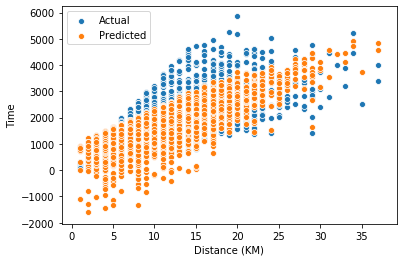

In [26]:
sns.scatterplot(x=X["Distance (KM)"], y=X["target"], label = 'Actual')
sns.scatterplot(x=X["Distance (KM)"], y=X["prediction"], label = 'Predicted')
sns.mpl.pyplot.ylabel("Time");

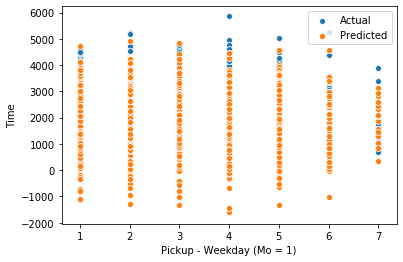

In [27]:
sns.scatterplot(x=X['Pickup - Weekday (Mo = 1)'], y=X["target"], label = 'Actual')
sns.scatterplot(x=X['Pickup - Weekday (Mo = 1)'], y=X["prediction"], label = 'Predicted')
sns.mpl.pyplot.ylabel("Time");

In [28]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(f"RMSE ~ {int(rmse)} seconds")

RMSE ~ 307 seconds
